# Capstone Project - Car accident severity
### Applied Data Science Capstone by IBM/Coursera


## Table of contents
* [Introduction](#introduction)
* [Data acquisition and cleaning](#data)
* [Exploratory Data Analysis](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<h1>1. Introduction</h1>

<h2>1.1 Background</h2>

The effective treatment of road accidents and thus the enhancement of road safety is a major concern to societies due to the losses in human lives and the economic and social costs.The effective treatment of road accidents and thus the enhancement of road safety is a major concern to societies due to the losses in human lives and the economic and social costs. In USA for 2016, NHTSA  data shows 37,461 people were killed in 34,436 motor vehicle crashes, an average of 102 per day. Over the years, tremendous efforts have been made by governments, transportation researchers and practitioners in order to improve road safety. Creating a model that predicts accidents and their severity can be advantageous for many reasons, as road design can be even more optimized, drivers can be informed on the danger they are facing based on their personal information and the current environmental conditions.

<h2>1.2 Problem</h2>

A number of factors contribute to the risk of collisions, including vehicle design and type, road design and environment, driving skills, as well as weather and light conditions. This project aims to predict the severity of a possible accident based on factors that are set before the accident happen like the driver’s age, the area the driver is currently at, including the light conditions and the time (hour) of the day.


<h2>1.3 Interest</h2>

Government organizations that administrate road safety would be interested in accurate prediction of accidents and its severity, like the National Highway Traffic Safety Administration. The project can be expanded into an application that uses ‘live’ data on a driver’s information, location and environmental conditions and warn him/her to slow down or even use other safer paths to his/her destination.


<h1>2. Data acquisition and cleaning</h1>

<h2>2.1 Data sources</h2>

The data used on the project comes from a dataset called UK Car Accidents. It is collected from the UK Department for Transport and can be found on Kaggle. The dataset starts at 2005, ends at 2015 and is composed by three different csv files (Accidents, Causalities, and Vehicles). It was selected because it offered a great amount of variables (features) for each accident like personal information on the driver, environmental conditions and vehicle information. Also, the accidents were classified into three types of severity (1. Fatal, 2. Serious, 3. Slight) which gave promise for a model with more specific predictions than most datasets that offered binary classification for the accidents severity. 

<h2>2.2 Data cleaning</h2>

The 3 different csv files were joined into one data frame using the common column ‘Accident Index’. The data was in a good condition as most of the variables were already categorical variables (integers) and there were few null values (172 null values for the ‘Time’ column only). 
Multiple columns such as ‘Weather Conditions’, ‘Road Surface Conditions’ and others, included Unknown or Other values marked as -1 or 9 accordingly. All the rows that had either value was removed from the data.
Additionally, the ‘Age Band of Driver’ column included values for extremely under aged drivers that were under 15 years old. The rows containing these values were removed from the data.
Finally, a number of functions were created that converted categorical variables to the corresponding string which described the variable’s value (e.g. for ‘Day’ column: 1 converted to ‘Monday’, 2 converted to ‘Tuesday’ etc.). These functions were needed in order to better explore the relations between the data and create easy to read statistical plots. 


In [1]:
#Importing pandas and data (3 csv files).
import pandas as pd
import numpy as np 

center = pd.read_csv('Vehicles0514.csv')
left = pd.read_csv('Accidents0514.csv')
right = pd.read_csv('Casualties0514.csv')

C:\Users\DIMITRIS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Discard the columns we don't plan to use from each table.
left.drop(['Date','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Police_Force','Number_of_Vehicles','Number_of_Casualties','Local_Authority_(District)','Local_Authority_(Highway)','1st_Road_Class','1st_Road_Number','Junction_Detail','Speed_limit','Junction_Control','2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location'],axis=1, inplace=True)
right.drop(['Casualty_Class','Casualty_Type','Casualty_Severity','Sex_of_Casualty','Age_of_Casualty','Age_Band_of_Casualty','Vehicle_Reference','Casualty_Reference','Pedestrian_Location','Pedestrian_Movement','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Home_Area_Type'],inplace=True,axis=1)
center.drop(['Sex_of_Driver','Driver_IMD_Decile','Engine_Capacity_(CC)','Driver_IMD_Decile','Hit_Object_off_Carriageway','Vehicle_Leaving_Carriageway','Vehicle_Reference','Towing_and_Articulation','Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane','Junction_Location','Skidding_and_Overturning','Hit_Object_in_Carriageway','1st_Point_of_Impact','Was_Vehicle_Left_Hand_Drive?','Journey_Purpose_of_Driver','Age_of_Driver','Propulsion_Code','Driver_Home_Area_Type'],inplace=True,axis=1)

In [3]:
#Join the 3 data sets on the common column Accident Index.
df_temp = pd.merge(left, right, on='Accident_Index')
df = pd.merge(df_temp, center, on='Accident_Index')
df.columns

Index(['Accident_Index', 'Accident_Severity', 'Day_of_Week', 'Time',
       'Road_Type', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type',
       'Age_Band_of_Driver', 'Age_of_Vehicle'],
      dtype='object')

In [4]:
#Remove Accident Index column since we need it just for joining the tables.
df.drop(['Accident_Index'],inplace=True,axis=1)

In [11]:
#Dimensions of our dataset at this point
df.shape

(2892839, 11)

Unknown values in our data have the value -1 or a specific number
for the particular column used for unknown values.
Let's start the data cleaning process by removing all unknown values.

In the Weather Conditions column, values of 9 and -1 means 'unknown'. Thus, we remove them from our data. The same pattern persists in other columns as well.

In [5]:
df = df[df.Weather_Conditions != 9]
df = df[df.Weather_Conditions != -1]
df.columns

Index(['Accident_Severity', 'Day_of_Week', 'Time', 'Road_Type',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Age_Band_of_Driver',
       'Age_of_Vehicle'],
      dtype='object')

In [7]:
#Removing the unknown or invalid values.
df = df[df.Road_Surface_Conditions != -1]
df = df[df.Urban_or_Rural_Area != 3]
df = df[df.Vehicle_Type != -1]
df = df[df.Age_Band_of_Driver != 3]
df = df[df.Age_Band_of_Driver != -1]
df = df[df.Age_Band_of_Driver != 1]
df = df[df.Age_Band_of_Driver != 2]
df = df[df.Age_of_Vehicle != -1]
df = df[df.Road_Type != 9]

In [8]:
#Check for null values.
df.isnull().sum()

Accident_Severity            0
Day_of_Week                  0
Time                       175
Road_Type                    0
Light_Conditions             0
Weather_Conditions           0
Road_Surface_Conditions      0
Urban_or_Rural_Area          0
Vehicle_Type                 0
Age_Band_of_Driver           0
Age_of_Vehicle               0
dtype: int64

In [65]:
#Drop null values.
df.dropna(subset=['Time'],axis=0,inplace=True)

In [9]:
df.isnull().sum()

Accident_Severity            0
Day_of_Week                  0
Time                       175
Road_Type                    0
Light_Conditions             0
Weather_Conditions           0
Road_Surface_Conditions      0
Urban_or_Rural_Area          0
Vehicle_Type                 0
Age_Band_of_Driver           0
Age_of_Vehicle               0
dtype: int64

In [10]:
#Dimensions of our dataset after cleaning.
df.shape

(2892839, 11)

We cleaned the data, so we can now explore the relationships between the variables.

<h1>3.Exploratory Data Analysis</h1>

<h3> Cramer's V </h3>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Analyzing the relation between each one of the features with the Accident Severity was a difficult task for 2 reasons. Firstly, I needed a statistic that measures correlation between categorical variables. After some research on the topic, I decided that the optimal metric for my case is  Cramer’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
1.	Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

2.	Like correlation, Cramer’s V is symmetrical

After testing the association between the variables and the severity, I found them to be highly unassociated.And this takes us to the second reason that analyzing the correlation between the severity and the features is a difficult task. The 84% of the accident have a Slight severity which makes the dataset very imbalanced since this is the feature we try to predict. The solution to this problem, at least for finding associations between the variables and the accidents was to test them against the total amount of accidents each category was involved. For example, 83% of the accidents happened during Fine weather which makes the feature not a good predictor for the model. In some cases I further explored the frequency of Fatal or Serious accidents against a particular feature in order to gain deeper insights.

In [54]:
#Cramer's V python function
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

The following code shows the results of measuring the features association with the Accident’s Severity (from the project’s Jupyter Notebook). The highest value is 0.14 for the “Urban or Rural Area” feature which is still very low (0 means no association, 1 means perfect association).

In [55]:
cramers_v(df['Day_of_Week'],df['Accident_Severity'])

0.032381111406731986

In [56]:
cramers_v(df['Accident_Severity'],df['Day_of_Week'])

0.032381111406731986

Cramer's V is indeed symmetrical, it gives the same value no matter how we order the input features.

In [70]:
cramers_v(df['Accident_Severity'],df['Time'])

0.11954514766863902

In [71]:
cramers_v(df['Accident_Severity'],df['Road_Type'])

0.04786839404913596

In [72]:
cramers_v(df['Accident_Severity'],df['Light_Conditions'])

0.08277667961628699

In [73]:
cramers_v(df['Accident_Severity'],df['Weather_Conditions'])

0.03684736395293936

In [74]:
cramers_v(df['Accident_Severity'],df['Road_Surface_Conditions'])

0.009163015415411712

In [75]:
cramers_v(df['Accident_Severity'],df['Urban_or_Rural_Area'])

0.144498400346582

In [76]:
cramers_v(df['Accident_Severity'],df['Vehicle_Type'])

0.10280761620992851

In [77]:
cramers_v(df['Accident_Severity'],df['Age_Band_of_Driver'])

0.030983211629291886

In [82]:
cramers_v(df['Accident_Severity'],df['Age_of_Vehicle'])

0.02540612571603147

<h2> Relation of Accidents with Day of the Week </h2>

In [43]:
#Count the amount of accidents per day for each day, store them into a new dataframe and sort them.
df_day = df['Day_of_Week']
df_day_count = df_day.value_counts().rename_axis('Day').reset_index(name='Total_Accidents')
df_day_count = df_day_count.sort_values(by ='Day')
df_day_count

,Day,Total_Accidents
6,1,493543
4,2,600987
3,3,627079
2,4,632503
1,5,636896
0,6,707791
5,7,588794


In [44]:
#Create function that converts Day_of_Week into a categorical variable.
def day(x):
    if x==1:
        return 'Monday'
    if x==2:
        return 'Tuesday'
    if x==3:
        return 'Wednesday'
    if x==4:
        return 'Thursday'
    if x==5:
        return 'Friday'
    if x==6:
        return 'Saturday'
    if x==7:
        return 'Sunday'

In [45]:
#Convert.
df_day_count['Day']=df_day_count['Day'].apply(lambda x: day(x))
df_day_count

,Day,Total_Accidents
6,Monday,493543
4,Tuesday,600987
3,Wednesday,627079
2,Thursday,632503
1,Friday,636896
0,Saturday,707791
5,Sunday,588794


Text(0.5, 1.0, 'Total Accidents per Day')

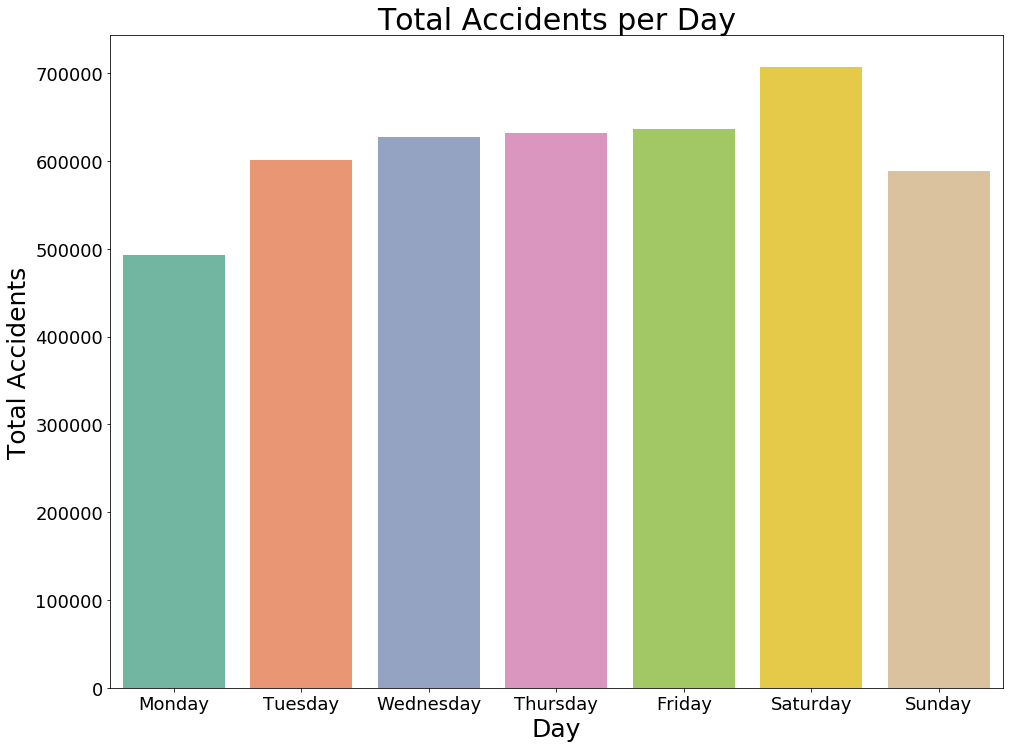

In [49]:
#Plot Accidents per Day.
plt.figure(figsize=(16,12))
ax=sns.barplot('Day','Total_Accidents',data=df_day_count,ci=None, palette='Set2')
ax.set_xlabel("Day",fontsize=25)
ax.set_ylabel("Total Accidents",fontsize=25)
ax.tick_params(labelsize=18)
plt.title('Total Accidents per Day',fontsize=30)

Looking at the barplot we can see that accidents are distributed in a similar way among each day of the week, 5 of the 7 days have a total of accidents in the range 300,000 - 350,000. Monday has the least amount of accidents while most accidents happen on Saturday, a day dedicated usually for amusement activities (clubing, traveling,alcohol etc.) which increase traffic and as it seems, the chance the of a car accident. In conclusion, since the accidents are similarly distributed among the days of the week, we will not use this variable as a predictor. 

In [54]:
#Drop the 'Day_of_week' column
df.drop(['Day_of_Week'],inplace=True,axis=1)

<h2> Relation of Accidents with Hour of the Day </h2>

In [68]:
#Create function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)

In [69]:
#Add Hour column
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [61]:
#Count the amount of accidents per hour, store them into a new dataframe and sort them.
df_hour = df['Hour']
df_hour_count = df_hour.value_counts().rename_axis('Hour').reset_index(name='Total_Accidents')
df_hour_count = df_hour_count.sort_values(by ='Hour')
df_hour_count

,Hour,Total_Accidents
18,0,29979
19,1,20760
20,2,15722
22,3,12665
23,4,9851
21,5,15304
17,6,36300
12,7,95904
3,8,165889
10,9,111237


Text(0.5, 1.0, 'Total Accidents per Hour')

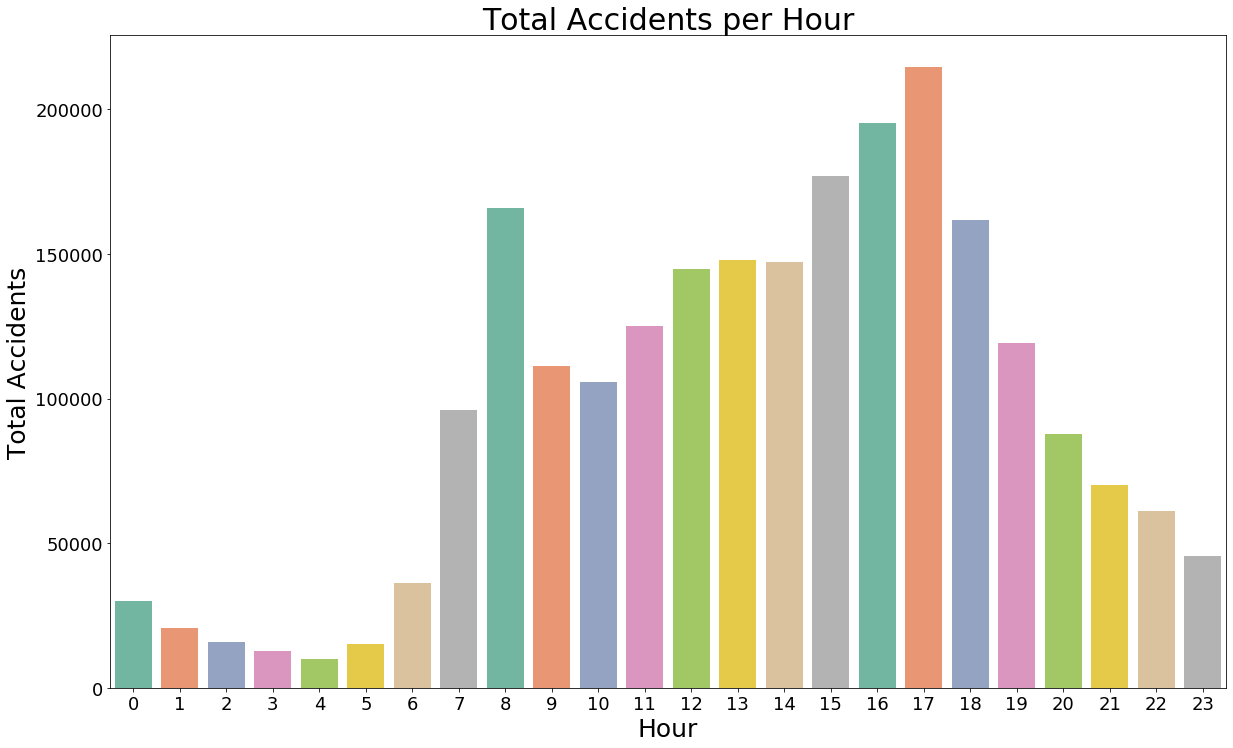

In [146]:
#Plot Accidents per Hour.
plt.figure(figsize=(20,12))
ax=sns.barplot('Hour','Total_Accidents',data=df_hour_count,ci=None, palette='Set2')
ax.set_xlabel("Hour",fontsize=25)
ax.set_ylabel("Total Accidents",fontsize=25)
ax.tick_params(labelsize=18)
plt.title('Total Accidents per Hour',fontsize=30)

The barplot shows the distribution of accidents among the hours of a day. We can notice a high variance on the amount of accidents, the early hours of a day have a small amount of accidents which is normal considering the reduced traffic at these hours. Later on, the amount of accidents rises during busy hours (8, 16-18). This feature of the data can be used as a predictor for our model. 

<h2> Relation of Accidents with Road Type </h2>

In [73]:
#Count the amount of accidents per road type and store them into a new dataframe.
df_road_type = df['Road_Type']
df_road_t_count = df_road_type.value_counts().rename_axis('Road_Type').reset_index(name='Total_Accidents')
df_road_t_count

,Road_Type,Total_Accidents
0,6,1656803
1,3,450481
2,1,141710
3,2,31883
4,7,28682


Using the dataset's Attribute Information, we can convert the Road_Type column into a categorical variable, in order to draw conclusions.

In [76]:
#Create function that converts Road_Type to a categorical variable.
def road_type(x):
    if x==1:
        return 'Roundabout'
    if x==2:
        return 'One way street'
    if x==3:
        return 'Dual carriageway'
    if x==6:
        return 'Single carriageway'
    if x==7:
        return 'Slip Road'

In [77]:
#Convert
df_road_t_count['Road_Type']=df_road_t_count['Road_Type'].apply(lambda x: road_type(x))
df_road_t_count

,Road_Type,Total_Accidents
0,Single carriageway,1656803
1,Dual carriageway,450481
2,Roundabout,141710
3,One way street,31883
4,Slip Road,28682


Text(0.5, 1.0, 'Total Accidents per Road Type')

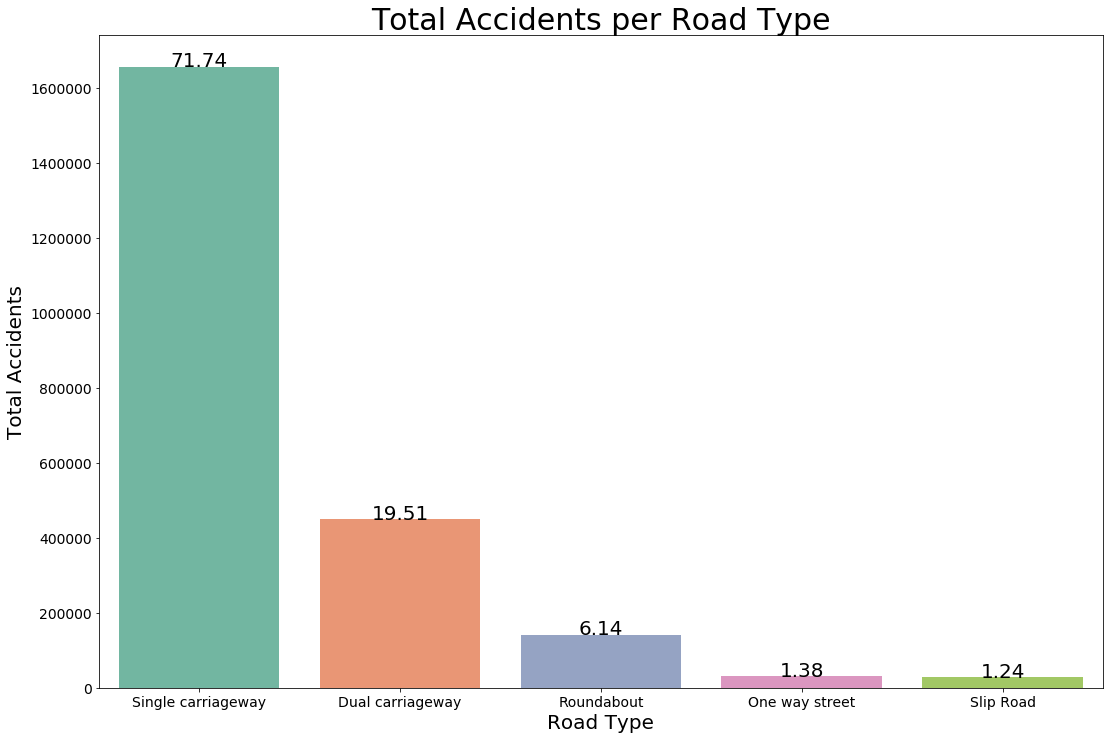

In [144]:
#Plot Accidents per Road Type.
plt.figure(figsize=(18,12))
ax=sns.barplot('Road_Type','Total_Accidents',data=df_road_t_count,ci=None, palette='Set2')
ax.set_xlabel("Road Type",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=14)
#Annotate the bars with percentages.
total = df_road_t_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Road Type',fontsize=30)

The barplot clearly shows an imbalance in the Road Type feature, 71.74% of the accidents happened in a Single carriageway. This makes the feature not useful for our model.  

In [85]:
#Drop the 'Road_Type' column
df.drop(['Road_Type'],inplace=True,axis=1)

<h2> Relation of Accidents with Light Conditions </h2>

In [13]:
#Count the amount of accidents per light conditions and store them into a new dataframe.
df_light_c = df['Light_Conditions']
df_light_c_count = df_light_c.value_counts().rename_axis('Light_Conditions').reset_index(name='Total_Accidents')
df_light_c_count

,Light_Conditions,Total_Accidents
0,1,2138041
1,4,541678
2,6,179280
3,7,21243
4,5,12597


Using the dataset's Attribute Information, we can convert the Light_Conditions column into a categorical variable, in order to draw conclusions.

In [14]:
#Create function that converts Light_Conditions to a categorical variable.
def light_conditions(x):
    if x==1:
        return 'Daylight'
    if x==4:
        return 'Darkness-lights lit'
    if x==5:
        return 'Darkness-lights unlit'
    if x==6:
        return 'Darkness-no lighting'
    if x==7:
        return 'Darkness-lighting unknown'

In [15]:
#Convert
df_light_c_count['Light_Conditions']=df_light_c_count['Light_Conditions'].apply(lambda x: light_conditions(x))
df_light_c_count

,Light_Conditions,Total_Accidents
0,Daylight,2138041
1,Darkness-lights lit,541678
2,Darkness-no lighting,179280
3,Darkness-lighting unknown,21243
4,Darkness-lights unlit,12597


Text(0.5, 1.0, 'Total Accidents per Light Conditions')

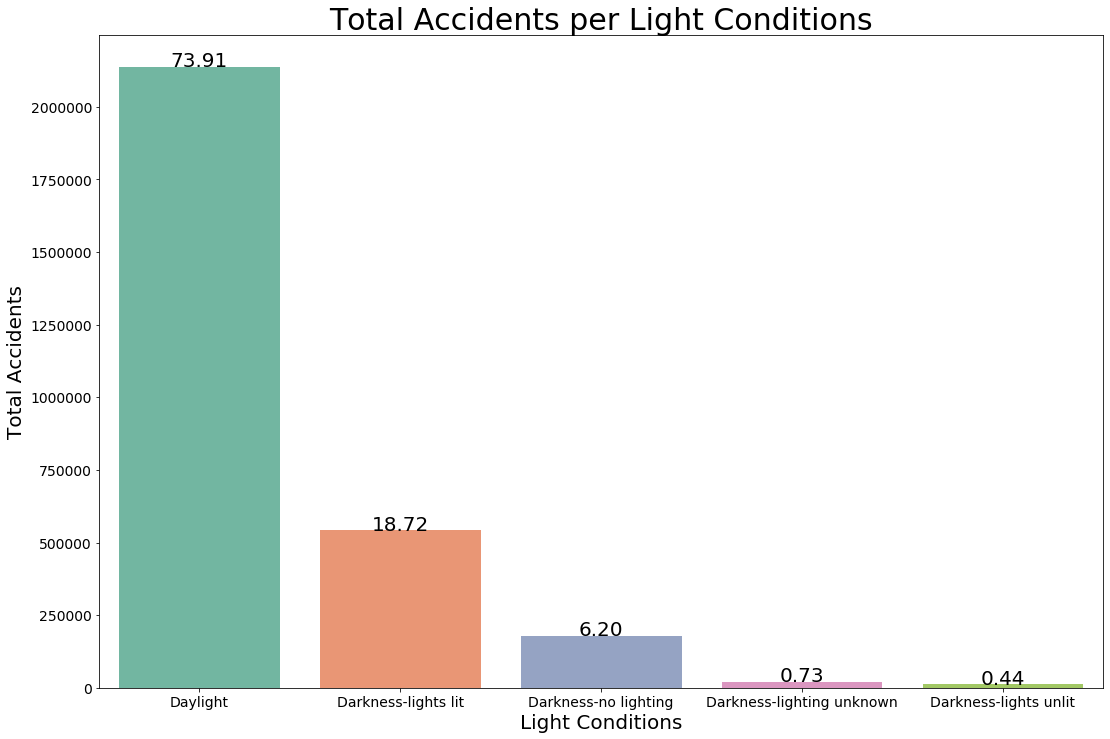

In [16]:
#Plot Accidents per Light Conditions.
plt.figure(figsize=(18,12))
ax=sns.barplot('Light_Conditions','Total_Accidents',data=df_light_c_count,ci=None, palette='Set2')
ax.set_xlabel("Light Conditions",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=14)
#Annotate the bars with percentages.
total = df_light_c_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Light Conditions',fontsize=30)

From the barplot we can notice that 74% of the accidents happen in daylight. This fact is also noticed in the Hour barplot we created, where most of the accidents happened at morning or early afternoon hours. It is normal for the drivers to be more careful when driving in the dark. Furthermore traffic tends to be at lower levels at night or very early morning (when its mostly dark). The light conditions are in a way represented from the Time column but let's take the time to dig a little bit deeper in the data in order to make sure there is no information to be gained from this feature.   

Firstly, lets combine the different darkness values (lights lit,no lights etc) into one value named 'Dark'.

In [17]:
#Create function that converts Light_Conditions to a categorical variable.
def light_vs_dark(x):
    if x==1:
        return 'Daylight'
    if x==4 or x==5 or x==6 or x==7:
        return 'Dark'

In [21]:
#Convert
df_light_c = df['Light_Conditions']
df_light_c_count = df_light_c.value_counts().rename_axis('Light_Conditions').reset_index(name='Total_Accidents')
df_light_c_count['Light_Conditions']=df_light_c_count['Light_Conditions'].apply(lambda x: light_vs_dark(x))
df_light_c_count

,Light_Conditions,Total_Accidents
0,Daylight,2138041
1,Dark,541678
2,Dark,179280
3,Dark,21243
4,Dark,12597


In [22]:
#Group the data by the light_conditions column and sum the total accidents for each of the 2 categories.
df_light_c_count = df_light_c_count.groupby(by=['Light_Conditions'],as_index=False).sum()
df_light_c_count

,Light_Conditions,Total_Accidents
0,Dark,754798
1,Daylight,2138041


Text(0.5, 1.0, 'Total Accidents per Light Conditions')

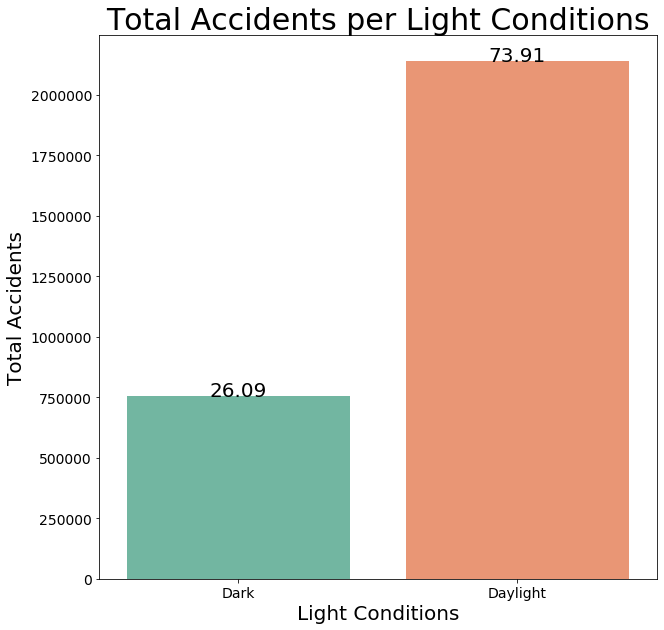

In [23]:
#Plot Accidents per Light Conditions.
plt.figure(figsize=(10,10))
ax=sns.barplot('Light_Conditions','Total_Accidents',data=df_light_c_count,ci=None, palette='Set2')
ax.set_xlabel("Light Conditions",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=14)
#Annotate the bars with percentages.
total = df_light_c_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Light Conditions',fontsize=30)

This barplot is the same with the last one but all the darkness categories are now combined into one (Dark). Having combined the data we can now move on 'digging deeper' in the data and explore the relation of light condition with fatal only accidents. 

In [24]:
#Extract only the fatal accidents from the main dataframe df.
fatal_accidents = df['Accident_Severity'] == 1
df_fatal = df[fatal_accidents]

In [37]:
#Convert the column in the previous 'combination' we explained.
df_fatal['Light_Conditions']=df_fatal['Light_Conditions'].apply(lambda x: light_vs_dark(x))

In [26]:
#Count the amount of accidents per light conditions and store them into a new dataframe.
df_fatal_light = df_fatal['Light_Conditions']
df_fatal_light_count = df_fatal_light.value_counts().rename_axis('Light_Conditions').reset_index(name='Total_Accidents')
df_fatal_light_count

,Light_Conditions,Total_Accidents
0,Daylight,37321
1,Dark,23523


In [34]:
#Reorder the index in order to have similar plots.
df_ordered = df_fatal_light_count.reindex([1,0])
df_ordered

,Light_Conditions,Total_Accidents
1,Dark,23523
0,Daylight,37321


Text(0.5, 1.0, 'Total  Fatal Accidents per Light Conditions')

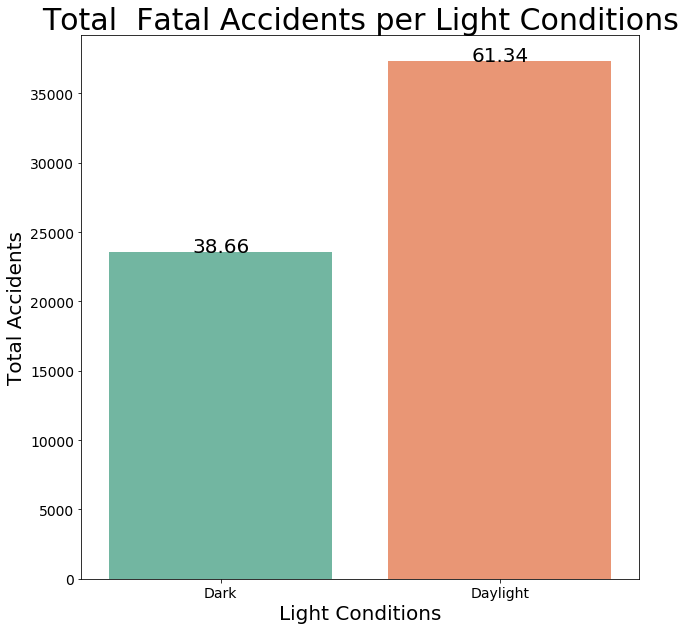

In [35]:
#Plot Accidents per Light Conditions.
plt.figure(figsize=(10,10))
ax=sns.barplot('Light_Conditions','Total_Accidents',data=df_ordered,ci=None, palette='Set2')
ax.set_xlabel("Light Conditions",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=14)
#Annotate the bars with percentages.
total = df_fatal_light_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total  Fatal Accidents per Light Conditions',fontsize=30)

This is what we were looking for! While only 26% of the accidents happen when dark, the percentage goes up to almost 40% when examining only fatal accidents. The barplot shows an associaton between fatal accidents and dark light conditions, hence we will include the column Light_Conditions in our model.

<h2> Relation of Accidents with Weather Conditions </h2>

In [125]:
#Count the amount of accidents per light conditions and store them into a new dataframe.
df_weather_c = df['Weather_Conditions']
df_weather_c_count = df_weather_c.value_counts().rename_axis('Weather_Conditions').reset_index(name='Total_Accidents')
df_weather_c_count = df_weather_c_count[df_weather_c_count.Weather_Conditions != 8]
df_weather_c_count

,Weather_Conditions,Total_Accidents
0,1,1867237
1,2,291490
3,5,32016
4,4,29907
5,7,17788
6,3,16447
7,6,2999


Using the dataset's Attribute Information, we can convert the Weather_Conditions column into a categorical variable, in order to draw conclusions.

In [126]:
#Create function that converts Weather_Conditions to a categorical variable.
def weather_conditions(x):
    if x==1:
        return 'Fine no high winds'
    if x==2:
        return 'Raining no high winds'
    if x==3:
        return 'Snowing no high winds'
    if x==4:
        return 'Fine + high winds'
    if x==5:
        return 'Raining + high winds'
    if x==6:
        return 'Snowing + high winds'
    if x==7:
        return 'Fog or mist'

In [128]:
#Convert
df_weather_c_count['Weather_Conditions']=df_weather_c_count['Weather_Conditions'].apply(lambda x: weather_conditions(x))
df_weather_c_count

,Weather_Conditions,Total_Accidents
0,Fine no high winds,1867237
1,Raining no high winds,291490
3,Raining + high winds,32016
4,Fine + high winds,29907
5,Fog or mist,17788
6,Snowing no high winds,16447
7,Snowing + high winds,2999


Text(0.5, 1.0, 'Total Accidents per Weather Conditions')

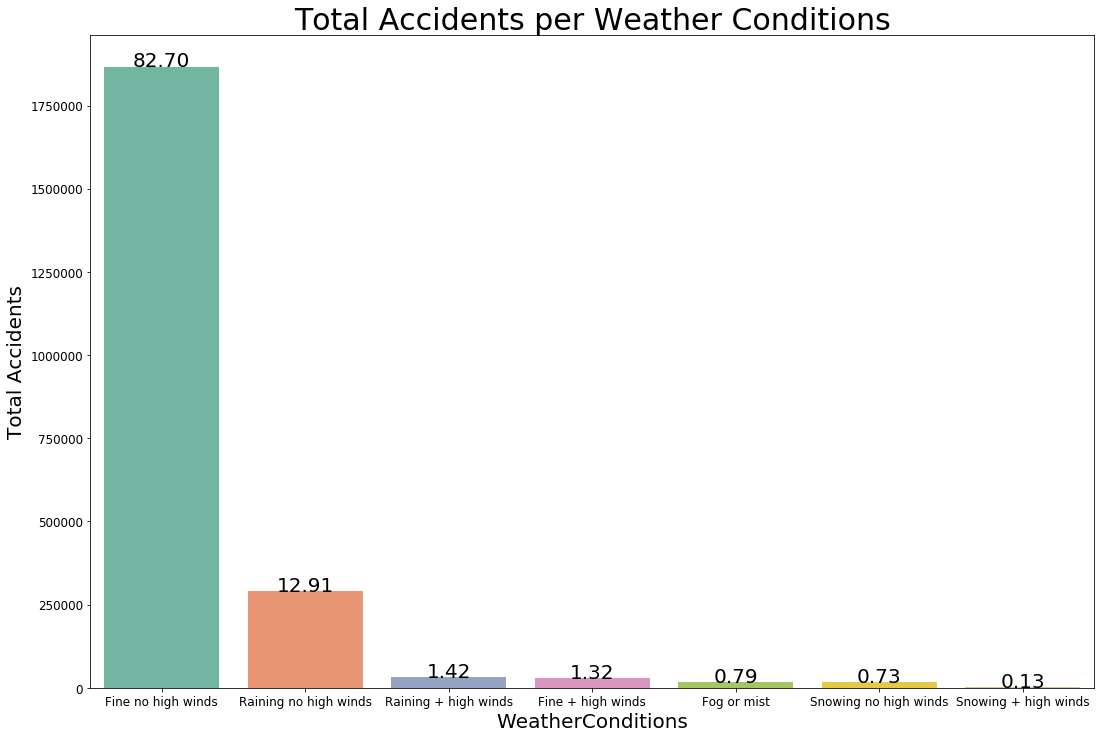

In [142]:
#Plot Accidents per Weather Conditions.
plt.figure(figsize=(18,12))
ax=sns.barplot('Weather_Conditions','Total_Accidents',data=df_weather_c_count,ci=None, palette='Set2')
ax.set_xlabel("Weather Conditions",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=12)
#Annotate the bars with percentages.
total = df_weather_c_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Weather Conditions',fontsize=30)

82,70% of the accidents happen while the weather is fine with no high winds. Even though it seems weird that bad weather like rain which traditionally makes driving harder, does not affect accidents, an argument can be made that drivers are more focused and careful when driving in bad weather conditions. The weather feature will not be used in our model. 

In [ ]:
#Drop the 'Weather_Conditions' column
df.drop(['Weather_Conditions'],inplace=True,axis=1)

<h2> Relation of Accidents with Road Surface Conditions </h2>

In [20]:
#Count the amount of accidents per Road Surface Conditions and store them into a new dataframe.
df_r_surface_c = df['Road_Surface_Conditions']
df_r_surface_c_count = df_r_surface_c.value_counts().rename_axis('Road_Surface_Conditions').reset_index(name='Total_Accidents')
df_r_surface_c_count

,Road_Surface_Conditions,Total_Accidents
0,1,1546151
1,2,698499
2,4,46801
3,3,14609
4,5,3499


Using the dataset's Attribute Information, we can convert the Road_Surface_Conditions column into a categorical variable, in order to draw conclusions.

In [23]:
#Create function that converts  Road_Surface_Conditions to a categorical variable.
def road_surface(x):
    if x==1:
        return 'Dry'
    if x==2:
        return 'Wet or damp'
    if x==3:
        return 'Snow'
    if x==4:
        return 'Frost or ice'
    if x==5:
        return 'Flood over 3cm. deep'

In [24]:
#Convert
df_r_surface_c_count['Road_Surface_Conditions']=df_r_surface_c_count['Road_Surface_Conditions'].apply(lambda x: road_surface(x))
df_r_surface_c_count

,Road_Surface_Conditions,Total_Accidents
0,Dry,1546151
1,Wet or damp,698499
2,Frost or ice,46801
3,Snow,14609
4,Flood over 3cm. deep,3499


Text(0.5, 1.0, 'Total Accidents per Road Surface Conditions')

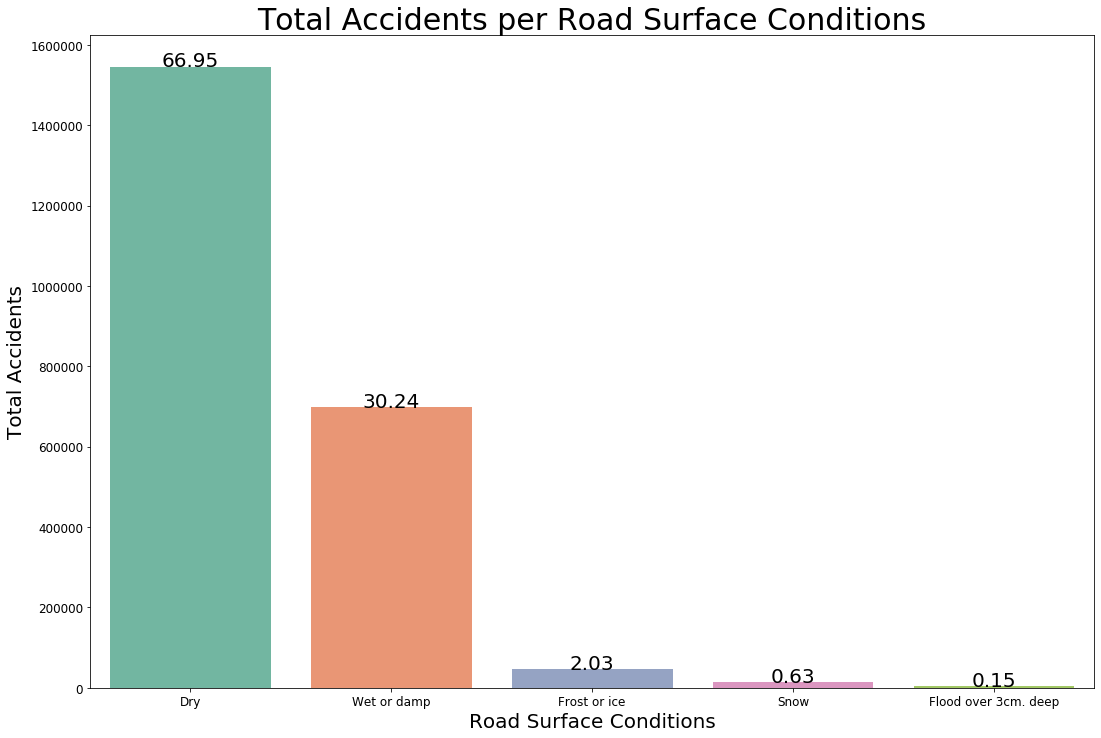

In [26]:
#Plot Accidents per Road Surface Conditions.
plt.figure(figsize=(18,12))
ax=sns.barplot('Road_Surface_Conditions','Total_Accidents',data=df_r_surface_c_count,ci=None, palette='Set2')
ax.set_xlabel("Road Surface Conditions",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=12)
#Annotate the bars with percentages.
total = df_r_surface_c_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Road Surface Conditions',fontsize=30)

Almost 70% of the accidents happen on Dry Roads. There is a chance that drivers pay more attention and are more focused when there are extreme road surface conditions. This is imbalance makes the feature not a good predictor for our model.

In [80]:
#Drop the 'Road_Surface_Conditions' column
df.drop(['Road_Surface_Conditions'],inplace=True,axis=1)

<h2> Relation of Accidents with Area Type </h2>

In [38]:
#Count the amount of accidents per Area and store them into a new dataframe.
df_area = df['Urban_or_Rural_Area']
df_area_count = df_area.value_counts().rename_axis('Urban_or_Rural_Area').reset_index(name='Total_Accidents')
df_area_count

,Urban_or_Rural_Area,Total_Accidents
0,1,1655308
1,2,1237531


Using the dataset's Attribute Information, we can convert the Road_Surface_Conditions column into a categorical variable, in order to draw conclusions.

In [39]:
#Create function that converts  Urban_or_Rural_Area to a categorical variable.
def area(x):
    if x==1:
        return 'Urban'
    if x==2:
        return 'Rural'

In [40]:
#Convert
df_area_count['Urban_or_Rural_Area']=df_area_count['Urban_or_Rural_Area'].apply(lambda x: area(x))
df_area_count

,Urban_or_Rural_Area,Total_Accidents
0,Urban,1655308
1,Rural,1237531


Text(0.5, 1.0, 'Total Accidents per Area')

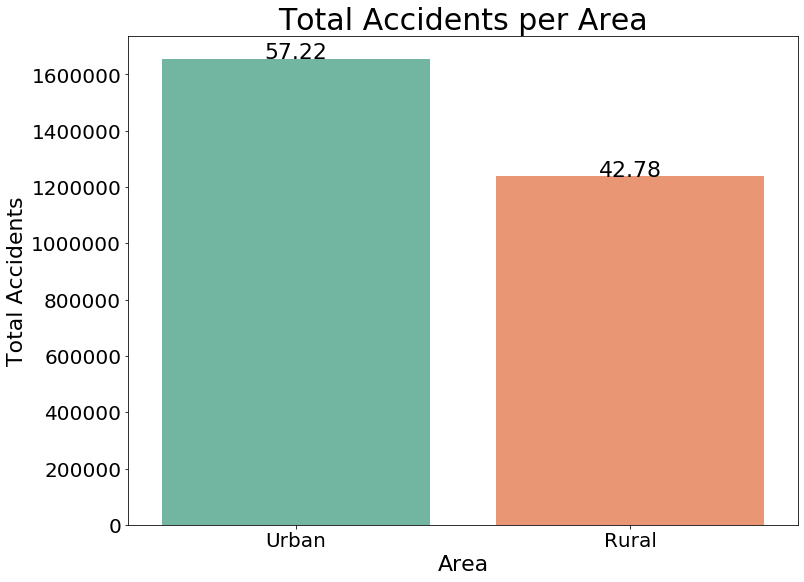

In [48]:
#Plot Accidents per Area.
plt.figure(figsize=(12,9))
ax=sns.barplot('Urban_or_Rural_Area','Total_Accidents',data=df_area_count,ci=None, palette='Set2')
ax.set_xlabel("Area",fontsize=22)
ax.set_ylabel("Total Accidents",fontsize=22)
ax.tick_params(labelsize=20)
#Annotate the bars with percentages.
total = df_area_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=22)
plt.title('Total Accidents per Area',fontsize=30)

Most accidents happen in Urban Areas but the difference is not very big (16.18). Lets see what is the difference only for the fatal accidents, which are rare in the dataset.

In [46]:
#Count the amount of accidents per area and store them into a new dataframe.
df_fatal_area = df_fatal['Urban_or_Rural_Area']
df_fatal_area_count = df_fatal_area.value_counts().rename_axis('Urban_or_Rural_Area').reset_index(name='Total_Accidents')
df_fatal_area_count

,Urban_or_Rural_Area,Total_Accidents
0,2,46311
1,1,14533


In [47]:
#Convert
df_fatal_area_count['Urban_or_Rural_Area']=df_fatal_area_count['Urban_or_Rural_Area'].apply(lambda x: area(x))
df_fatal_area_count

,Urban_or_Rural_Area,Total_Accidents
0,Rural,46311
1,Urban,14533


In [50]:
#Reorder the index in order to have similar plots.
df_ordered = df_fatal_area_count.reindex([1,0])
df_ordered

,Urban_or_Rural_Area,Total_Accidents
1,Urban,14533
0,Rural,46311


Text(0.5, 1.0, 'Total Fatal Accidents per Area')

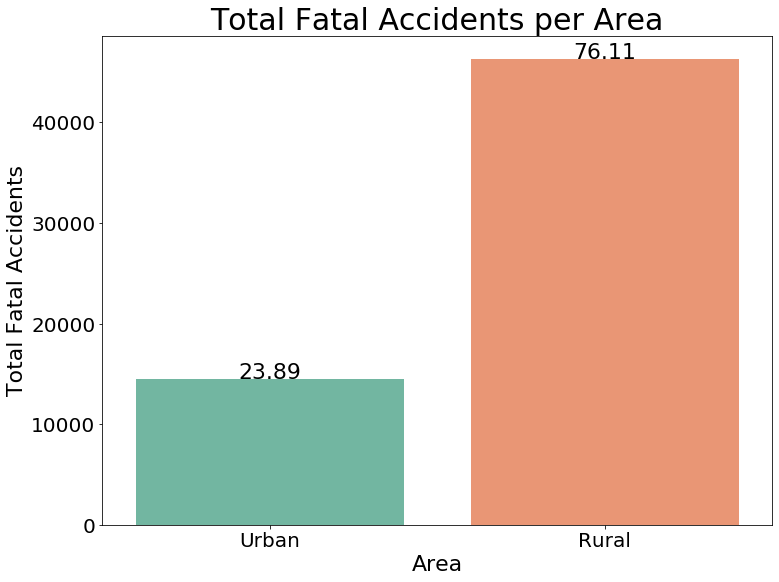

In [51]:
#Plot Accidents per Area.
plt.figure(figsize=(12,9))
ax=sns.barplot('Urban_or_Rural_Area','Total_Accidents',data=df_ordered,ci=None, palette='Set2')
ax.set_xlabel("Area",fontsize=22)
ax.set_ylabel("Total Fatal Accidents",fontsize=22)
ax.tick_params(labelsize=20)
#Annotate the bars with percentages.
total = df_ordered['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=22)
plt.title('Total Fatal Accidents per Area',fontsize=30)

The barplot shows how things are changed when we examine just the fatal accidents. While accidents in our dataset are almost equally distributed among rural and urban areas, when it comes to fatal accidents, 75% of them happen at rural areas. We will include this feature in our model.

<h2> Relation of Accidents with Vehicle Type </h2>

In [56]:
#Count the amount of accidents per Vehicle and store them into a new dataframe.
df_vehicle = df['Vehicle_Type']
df_vehicle_count = df_vehicle.value_counts().rename_axis('Vehicle_Type').reset_index(name='Total_Accidents')
df_vehicle_count

,Vehicle_Type,Total_Accidents
0,9,1898624
1,19,104662
2,5,67747
3,11,49432
4,3,45151
5,8,44056
6,21,37918
7,2,24620
8,4,16504
9,20,10125


Using the dataset's Attribute Information, we can convert the Vehicle_Type column into a categorical variable, in order to draw conclusions.

In [49]:
#Create function that converts Vehicle_Type to a categorical variable.
def vehicle(x):
    if x==1:
        return 'Pedal cycle'
    if x==2 or x==3 or x==4 or x==5 or x==23 or x==90 or x==97:
        return 'Motorcycle'
    if x==8:
        return 'Taxi/Private hire car'
    if x==9:
        return 'Car'
    if x==10 or x==11:
        return 'Bus'
    if x==17:
        return 'Agricultural vehicle'
    if x==19 or x==20 or x==21 or x==98:
        return 'Van/Goods'

In [57]:
#Convert
df_vehicle_count['Vehicle_Type']=df_vehicle_count['Vehicle_Type'].apply(lambda x: vehicle(x))
df_vehicle_count

,Vehicle_Type,Total_Accidents
0,Car,1898624
1,Van/Goods,104662
2,Motorcycle,67747
3,Bus,49432
4,Motorcycle,45151
5,Taxi/Private hire car,44056
6,Van/Goods,37918
7,Motorcycle,24620
8,Motorcycle,16504
9,Van/Goods,10125


In [58]:
#Group the data by the Vehicle Type column and sum the total accidents for each category.
df_vehicle_count = df_vehicle_count.groupby(by=['Vehicle_Type'],as_index=False).sum()
df_vehicle_count

,Vehicle_Type,Total_Accidents
0,Agricultural vehicle,1090
1,Bus,54345
2,Car,1898624
3,Motorcycle,158642
4,Taxi/Private hire car,44056
5,Van/Goods,152802


Text(0.5, 1.0, 'Total Accidents per Vehicle')

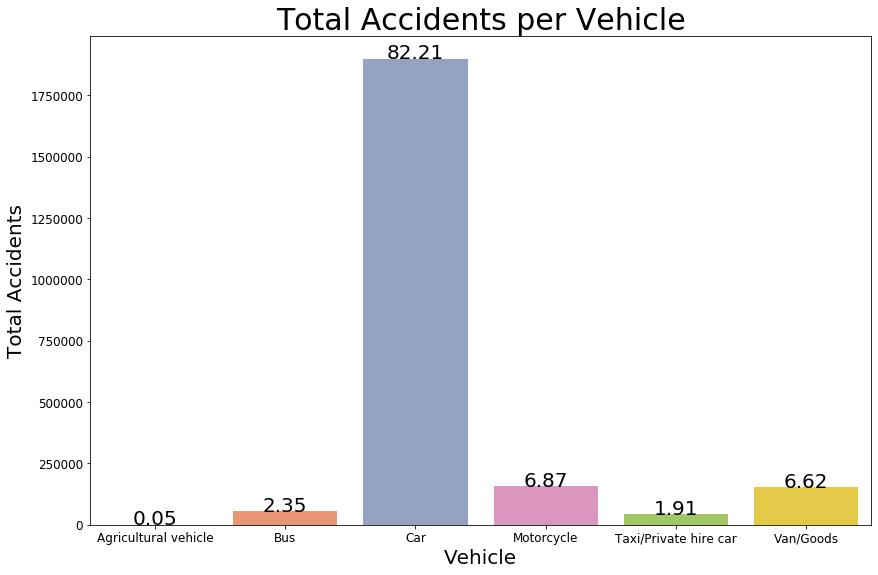

In [61]:
#Plot Accidents per Vehicle.
plt.figure(figsize=(14,9))
ax=sns.barplot('Vehicle_Type','Total_Accidents',data=df_vehicle_count,ci=None, palette='Set2')
ax.set_xlabel("Vehicle",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=12)
#Annotate the bars with percentages.
total = df_vehicle_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Vehicle',fontsize=30)

We can notice that 82.21% of the accidents are caused by cars. This probably happens because cars are the most common vehicle on public roads. An imbalance such this make the feature not a bad predictor for our model.

In [ ]:
#Drop the 'Vehicle_Type' column
df.drop(['Vehicle_Type'],inplace=True,axis=1)

<h2> Relation of Accidents with Driver's Age </h2>

In [85]:
#Count the amount of accidents per Age and store them into a new dataframe.
df_age = df['Age_Band_of_Driver']
df_age_count = df_age.value_counts().rename_axis('Age_Band_of_Driver').reset_index(name='Total_Accidents')
df_age_count = df_age_count.sort_values(by ='Age_Band_of_Driver')
df_age_count

,Age_Band_of_Driver,Total_Accidents
4,4,263184
3,5,301139
0,6,514857
1,7,490717
2,8,360487
5,9,216399
6,10,100780
7,11,61996


Using the dataset's Attribute Information, we can convert the Age_Band_of_Driver column into a categorical variable, in order to draw conclusions.

In [82]:
#Create function that converts Sex_of_Driver to a categorical variable.
def age(x):
    if x==4:
        return '16-20'
    if x==5:
        return '21-25'
    if x==6:
        return '26-35'
    if x==7:
        return '36-45'
    if x==8:
        return '46-55'
    if x==9:
        return '56-65'
    if x==10:
        return '66-75'
    if x==11:
        return 'Over 75'

In [86]:
#Convert
df_age_count['Age_Band_of_Driver']=df_age_count['Age_Band_of_Driver'].apply(lambda x: age(x))
df_age_count

,Age_Band_of_Driver,Total_Accidents
4,16-20,263184
3,21-25,301139
0,26-35,514857
1,36-45,490717
2,46-55,360487
5,56-65,216399
6,66-75,100780
7,Over 75,61996


Text(0.5, 1.0, "Total Accidents per Driver's Age")

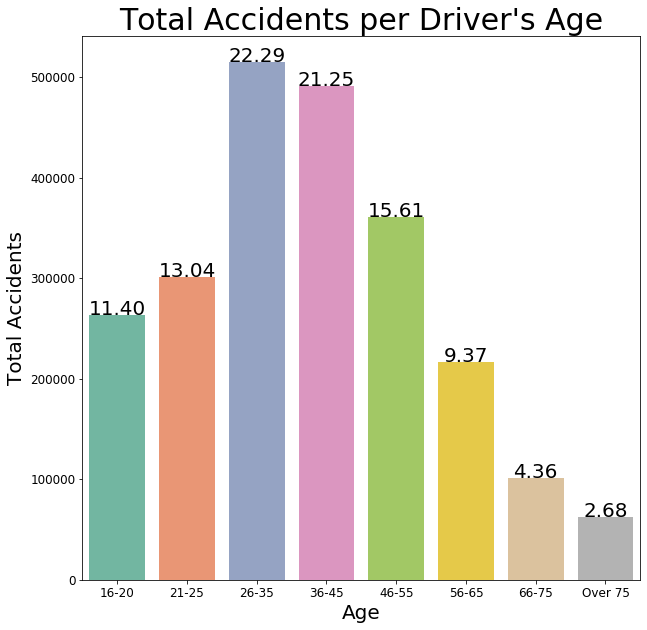

In [87]:
#Plot Accidents per Driver's age.
plt.figure(figsize=(10,10))
ax=sns.barplot('Age_Band_of_Driver','Total_Accidents',data=df_age_count,ci=None, palette='Set2')
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=12)
#Annotate the bars with percentages.
total = df_age_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Driver\'s Age',fontsize=30)

Someone would expect that younger drivers that lack driving experience or older ones that lack the reflexes, would be mostly associated with accidents. The barplot shows another case, where accidents are caused from drivers aged 26-55. Maybe overconfidence is a big factor in this case and causes more accidents without the driver's experience or reflexes being important. This feature is one we should use in our model given the important information it contains.

<h2> Relation of Accidents with Vehicle's Age </h2>

In [78]:
#Count the amount of accidents per Age and store them into a new dataframe.
df_age = df['Age_of_Vehicle']
df_age_count = df_age.value_counts().rename_axis('Age_of_Vehicle').reset_index(name='Total_Accidents')
df_age_count = df_age_count.sort_values(by ='Age_of_Vehicle')
df_age_count

,Age_of_Vehicle,Total_Accidents
0,1,235803
5,2,225501
7,3,222647
4,4,228448
2,5,229101
...,...,...
67,99,8
85,100,1
84,108,1
92,110,1


Let's convert the vehicle's age from discrete values to age bands.

In [79]:
#Create the age bandd, assing each element in the column age_of_vehicle to an age band and store its age band value to
# a new column named age_band_of_vehicle.
bins = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 108]
labels = ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', 'Over 100']
df_age_count['Age_Band_of_Vehicle'] = pd.cut(df_age_count.Age_of_Vehicle, bins, labels = labels,include_lowest = True)
df_age_count

,Age_of_Vehicle,Total_Accidents,Age_Band_of_Vehicle
0,1,235803,1-9
5,2,225501,1-9
7,3,222647,1-9
4,4,228448,1-9
2,5,229101,1-9
...,...,...,...
67,99,8,90-99
85,100,1,90-99
84,108,1,Over 100
92,110,1,NaN


In [80]:
#Group the data by the age band and sum the total accidents for each band.
df_age_count = df_age_count.groupby(by=['Age_Band_of_Vehicle'],as_index=False).sum()
df_age_count.drop(['Age_of_Vehicle'],inplace=True,axis=1)
df_age_count

,Age_Band_of_Vehicle,Total_Accidents
0,1-9,2237243
1,10-19,629225
2,20-29,16979
3,30-39,1702
4,40-49,704
5,50-59,303
6,60-69,63
7,70-79,71
8,80-89,21
9,90-99,10


Text(0.5, 1.0, "Total Accidents per Vehicle's Age")

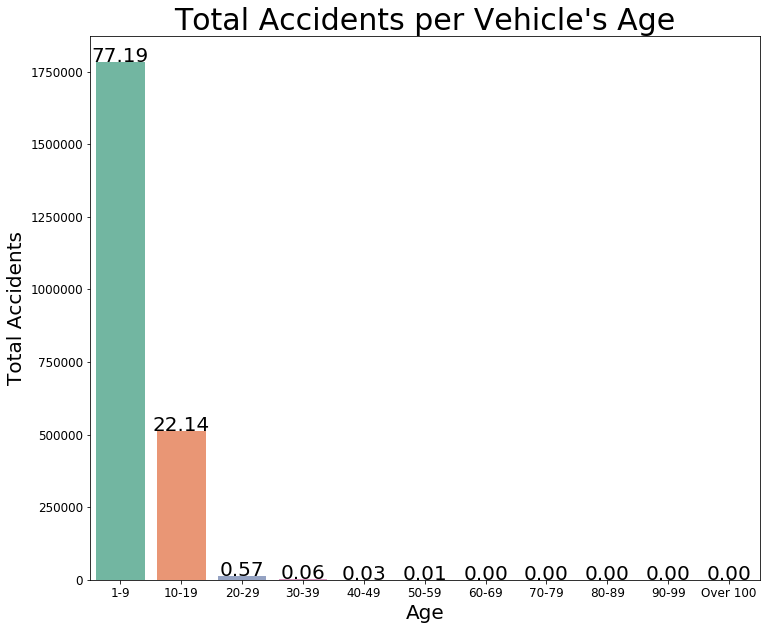

In [108]:
#Plot Accidents per Vehicle's age.
plt.figure(figsize=(12,10))
ax=sns.barplot('Age_Band_of_Vehicle','Total_Accidents',data=df_age_count,ci=None, palette='Set2')
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Total Accidents",fontsize=20)
ax.tick_params(labelsize=12)
#Annotate the bars with percentages.
total = df_age_count['Total_Accidents'].sum()
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100 * height/total),
            ha="center",fontsize=20)
plt.title('Total Accidents per Vehicle\'s Age',fontsize=30)

The vehicle's age does not seems to play an important role at the amount of accidents. The most logical reason would be that most of the vehicles on the road are less than 10 years old, creating this imbalance in the dataset.

In [20]:
#Drop the 'Age_of_Vehicle' column
df.drop(['Age_of_Vehicle'],inplace=True,axis=1)

<h1> 4. Predictive Modeling </h1>

After the analysis these are the 4 features selected as predictors plus Accident Severity column which is the target variable.

In [21]:
df.columns

Index(['Accident_Severity', 'Light_Conditions', 'Urban_or_Rural_Area',
       'Age_Band_of_Driver', 'Hour'],
      dtype='object')

In [337]:
df.shape

(2309559, 5)

The target attribute in our case is Accident Severity, a categorical variable with 3 discrete values (1: Fatal, 2: Serious, 3: Fatal). Based on the features we selected, we need our model to classify the severity of a possible accident. For that reason, we are going to use a classification model in order to make predictions. 

In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [23]:
#Create an array that contains the features we selected.
X = np.asarray(df[['Urban_or_Rural_Area','Age_Band_of_Driver','Hour','Light_Conditions']].astype('int'))
X[0:5]

array([[ 1,  7, 17,  4],
       [ 1,  6,  0,  4],
       [ 1,  9,  0,  4],
       [ 1,  8, 10,  1],
       [ 1,  8, 21,  7]])

In [24]:
#Standarize the data.
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.86525807,  0.14169598,  0.658802  ,  1.25872853],
       [-0.86525807, -0.43140846, -2.74990521,  1.25872853],
       [-0.86525807,  1.28790486, -2.74990521,  1.25872853],
       [-0.86525807,  0.71480042, -0.74478332, -0.56777877],
       [-0.86525807,  0.71480042,  1.46085076,  3.08523583]])

In [25]:
#Create an array that contains the target variable values.
y = np.asarray(df['Accident_Severity'])
y[0:5]

array([3, 3, 3, 3, 3], dtype=int64)

In [26]:
#Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Train set:', X_train.shape,  y_train.shape)

Test set: (577265, 4) (577265,)
Train set: (2309059, 4) (2309059,)


<h2> Logistic Regression </h2>

In [407]:
#Build the model using LogisticRegression and predict using the test dataset.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

One metric we are going to use to evaluate the models is the confusion matrix that shows a clear visualization on how the model is predicting among the different classes. The model's accurasy is evaluated using Macro average f1-score. Macro average is preferable in mutli-class classification, especially when there are class imbalances in the data. 

In [137]:
#Classification matrix for evaluation.
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[     0      0   8925]
 [     0      0  64492]
 [     0      0 388495]]


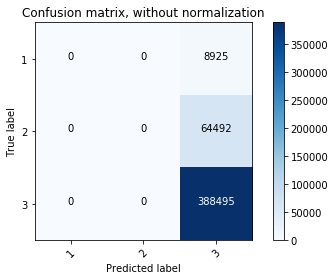

In [343]:
cnf_matrix = confusion_matrix(y_test, yhat,labels=[1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3],
                      title='Confusion matrix, without normalization')

In [344]:
print('\nClassification Report\n')
print(classification_report(y_test, yhat, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00      8925
     Class 2       0.00      0.00      0.00     64492
     Class 3       0.84      1.00      0.91    388495

    accuracy                           0.84    461912
   macro avg       0.28      0.33      0.30    461912
weighted avg       0.71      0.84      0.77    461912



The model has an accurasy of 84% which is very good, but it is nothing more than an 'illusion'. Looking at the confusion matrix above we can see that our model predicts only accidents with Slight Severity (label=3). The average f1-score for the classes is also 0.30 (macro avg). The reason that this happens is because most accidents in the dataset are classified as slight(class 3). 

In [345]:
#Count the values for each class
df['Accident_Severity'].value_counts()

3    1941990
2     322278
1      45291
Name: Accident_Severity, dtype: int64

In [349]:
#Count the percentage of slight accidents in the dataset.
Slight_Accidents = 1941990
Serious_and_Fatal_Accidents = 322278 + 45291
Total = Slight_Accidents + Serious_and_Fatal_Accidents
Percentage = Slight_Accidents*100/Total
print("The percentage of Slight accidents in the dataset is {:1.2f}%".format(Percentage))

The percentage of Slight accidents in the dataset is 84.08%


The model is, in other words, 'fed' data that contains mostly accidents of only one 1 class and is struggling to find patterns that differentiate the other 2 classes. What we have in our hands is a very imbalanced dataset but this is a realistic problem when it comes to 'real-life' data. There are ways to engineer the data in order to improve the model. After some research on the topic i came across Python's library imbalanced-learn, which is fully compatible with scikit-learn. The library offers resampling methods which are going to be used in order to bring some balance in the dataset.

<h3> Resampling </h3>

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

A very important step in this procedure is to first split our data into train and test datasets and then apply Resampling only on the training set, and not the testing set, in order to test our model on original data.

The first step will be to undersample the majority class.

In [357]:
#Count the amount of samples for each class.
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[      1       2       3]
 [  36366  257786 1553495]]


The code above prints samples for each class in the training set. We create our sampling strategy by copying the values for the first and the second class. After that we undersample the third class to 360.000 samples.

In [27]:
# define undersample strategy
sampling_strategy1 = {1: 36366, 2: 257786  , 3: 360000}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy1)
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)
print(Counter(y_over))

Counter({3: 360000, 2: 257786, 1: 36366})


The second step will be to oversample the two minority classes.

In [28]:
# define oversampling strategy
sampling_strategy2 = {1: 200000, 2: 340000, 3: 360000}
oversample = RandomOverSampler(sampling_strategy=sampling_strategy2)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_over, y_over)
print(Counter(y_over))

Counter({3: 360000, 2: 340000, 1: 200000})


The process of oversampling is now finished and we can build our model.

In [434]:
#Build the model using LogisticRegression and predict using the test dataset.
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_over,y_over)
yhat = LR.predict(X_test)

Confusion matrix, without normalization
[[  1944   4802   2179]
 [  7065  28224  29203]
 [ 22631 132975 232889]]


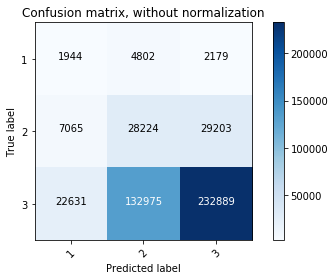

In [435]:
cnf_matrix = confusion_matrix(y_test, yhat,labels=[1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3],
                      title='Confusion matrix, without normalization')

In [436]:
print('\nClassification Report\n')
print(classification_report(y_test, yhat, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.06      0.22      0.10      8925
     Class 2       0.17      0.44      0.24     64492
     Class 3       0.88      0.60      0.71    388495

    accuracy                           0.57    461912
   macro avg       0.37      0.42      0.35    461912
weighted avg       0.77      0.57      0.64    461912



Looking at the confusion matrix we can see that the model now predicts accidents severity from all 3 classes. The macro avg is also increased to 0.35 but the results for classes 1,2 are still pretty low. There is definitely a need for more data on Fatal(1) and Serious(2) accidents but using resampling we managed to improve the results.

<h2> K-Nearest Neighbors </h2>

Using the same resampled training dataset (X_over,y_over) we test different values for k ,the number of neighbors, and calculate the macro heighest average f1 score for each k value. 

In [33]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_over,y_over)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = f1_score(y_test, yhat, average='macro')

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


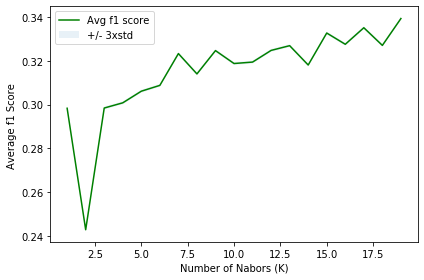

The best average f1 score was with 0.3392691489055588 with k= 19


In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Avg f1 score' , '+/- 3xstd'))
plt.ylabel('Average f1 Score ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best average f1 score was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The average f1 score seems to be improving as we add more neighbours in our model. We repeat the process starting from 20 neighbors.

In [35]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(20,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_over,y_over)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = f1_score(y_test, yhat, average='macro')

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

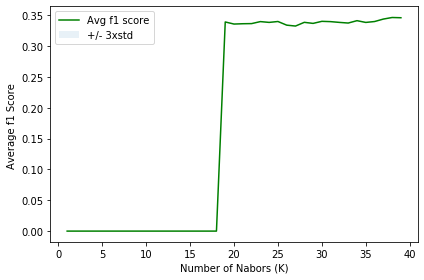

The best average f1 score was with 0.3465167841864985 with k= 38


In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Avg f1 score' , '+/- 3xstd'))
plt.ylabel('Average f1 Score ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best average f1 score was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The optimal number of neighbors is at k=38 with an average f1 score of ~0.35, the same score as the Logistic Regression.

<h2> Support Vector Machine </h2>

In [390]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_over, y_over)
yhat = clf.predict(X_test)
from sklearn.metrics import f1_score

0.6559591153565243

Confusion matrix, without normalization
[[  1871   4802   2252]
 [  6213  27947  30332]
 [ 18184 125245 245066]]


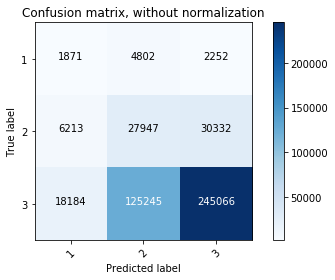

In [391]:
cnf_matrix = confusion_matrix(y_test, yhat,labels=[1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3],
                      title='Confusion matrix, without normalization')

In [392]:
print('\nClassification Report\n')
print(classification_report(y_test, yhat, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.07      0.21      0.11      8925
     Class 2       0.18      0.43      0.25     64492
     Class 3       0.88      0.63      0.74    388495

    accuracy                           0.60    461912
   macro avg       0.38      0.42      0.36    461912
weighted avg       0.77      0.60      0.66    461912



A very small improvement when using SVM on the model's accurasy and average f1 score

<h2> Decision Tree </h2>

In [395]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_over,y_over)
predTree = drugTree.predict(X_test)

Confusion matrix, without normalization
[[  1656   5695   1574]
 [  5152  34268  25072]
 [ 14508 161363 212624]]


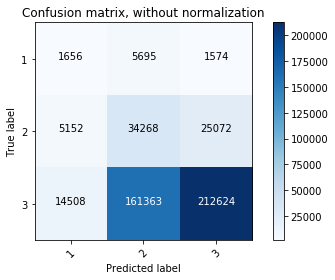

In [402]:
cnf_matrix = confusion_matrix(y_test, predTree,labels=[1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3],
                      title='Confusion matrix, without normalization')

In [404]:
print('\nClassification Report\n')
print(classification_report(y_test, predTree, target_names=['Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.08      0.19      0.11      8925
     Class 2       0.17      0.53      0.26     64492
     Class 3       0.89      0.55      0.68    388495

    accuracy                           0.54    461912
   macro avg       0.38      0.42      0.35    461912
weighted avg       0.77      0.54      0.61    461912



Looking at classification report we notice that the Desicion Tree performs slightly better when predicting classes 1,2 but slighlty worse when predicting class 3. The general perfomace is the same with KNN and Logistic Reggresion (macro avg f1 score = 0.35). 

<h1>5. Conclusions</h1>

In this study, I analyzed the relationship between Accidents Severity and Environmental factors that preceded the accidents, the Drivers personal information and the Timing of the accidents. I identified Light Conditions, the Drivers Age, the Hour of the Day and the Area Type as the most important features that affect Accident frequency and severity. I built classification models to predict the severity of a possible accident.
 These models can help government organizations to pinpoint dangerous areas or roads and improve road design. Another possibility is the development of an application that is ‘fed’ live data on the environment’s conditions the driver is driving through, his/her personal information and warn them on the danger they are currently facing, in the same way people that smoke are given facts about how smoking hinders their health, on top of the packets. In our case though this could happen through connected cars that have internet access and notify the driver when the danger levels are high or even through mobile phones where a driver can check information on his/her journey’s danger before they start it.


<h1>6. Future directions</h1>

I was able to achieve a 60% accuracy in the classification problem and improve the way the models predicted classes other than Slight accidents. However, the models still struggle to find patterns for Fatal and Serious accidents and poorly predict these classes. There is definitely a need for more data on Fatal and Serious accidents in order to minimize the use of Resampling in our data and improve the models performance.
Furthermore, even more features can be collected on the accidents like information on prior to the accident alcohol consumption or drug usage from the driver’s side, on the usage of mobile phones, the frequency and the type of mechanical failures and the amount of passengers inside the vehicle. These data are obviously more difficult to extract but can bring significant improvements to the model.
